In [1]:
###Face detection 

In [3]:
!pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25854 sha256=5e0f87ba364987fbf3c8a277a55b366f6bc3847c1c604d38da9aa20965d8aa8c
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\31\d0\2c\87ce38f6052879e5b7b18f0f8b4a10ad2a9d210e908d449f16
Successfully built imutils


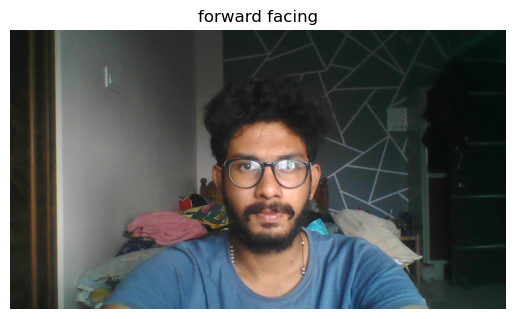

In [9]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('WIN_20250106_16_13_18_Pro.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
plt.imshow(image_rgb)
plt.title("forward facing")
plt.axis('off')  # Hide axes
plt.show()


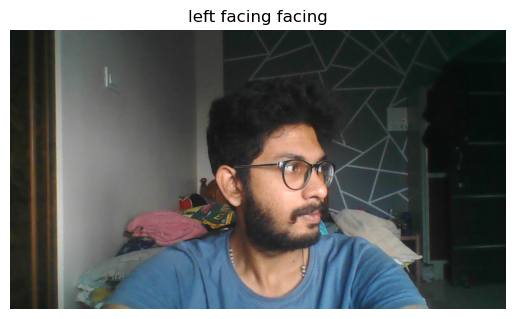

In [15]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('WIN_20250106_16_13_20_Pro.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
plt.imshow(image_rgb)
plt.title("left facing facing")
plt.axis('off')  # Hide axes
plt.show()


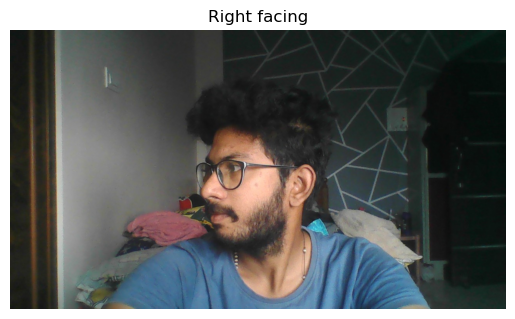

In [17]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('WIN_20250106_16_13_22_Pro.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
plt.imshow(image_rgb)
plt.title("Right facing")
plt.axis('off')  # Hide axes
plt.show()


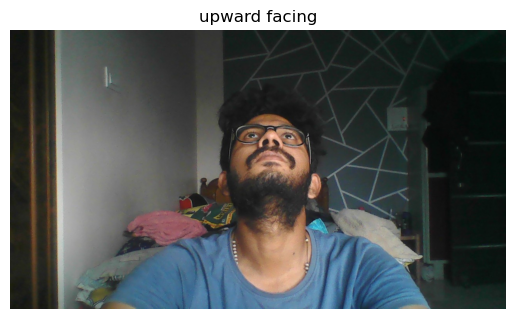

In [21]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('WIN_20250106_16_13_25_Pro.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
plt.imshow(image_rgb)
plt.title("upward facing")
plt.axis('off')  # Hide axes
plt.show()


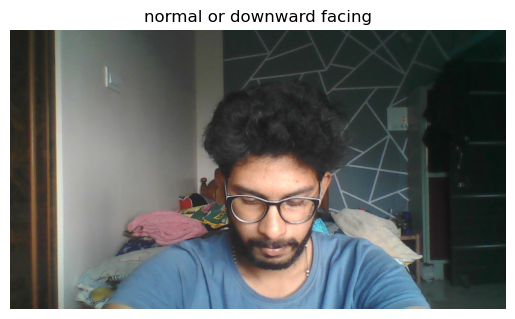

In [23]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('WIN_20250106_16_13_28_Pro.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
plt.imshow(image_rgb)
plt.title("normal or downward facing")
plt.axis('off')  # Hide axes
plt.show()


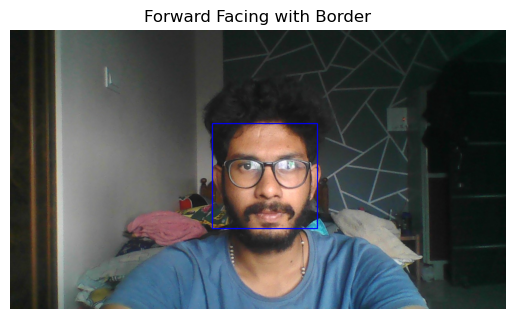

In [24]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('WIN_20250106_16_13_18_Pro.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load pre-trained Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangle (border) around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue border with thickness 2

# Convert BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the result
plt.imshow(image_rgb)
plt.title("Forward Facing with Border")
plt.axis('off')
plt.show()


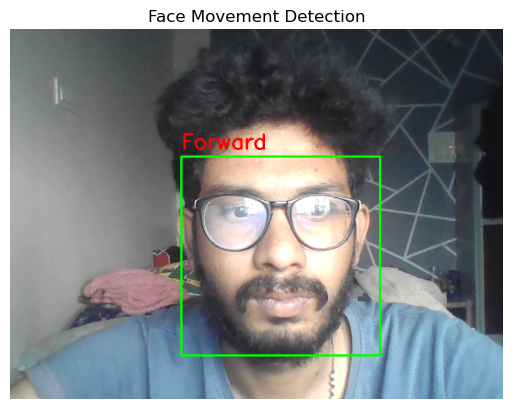

In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt



# Initialize dlib's face detector (HOG-based) and create the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Download this file separately

# Start video capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        # Get the landmarks
        landmarks = predictor(gray, face)
        
        # Get the coordinates of the nose tip (landmark #30)
        nose_x = landmarks.part(30).x
        nose_y = landmarks.part(30).y

        # Get the face center
        face_center_x = (face.left() + face.right()) // 2
        face_center_y = (face.top() + face.bottom()) // 2

        # Determine the direction based on the nose position relative to the face center
        if nose_x < face_center_x - 10:
            direction = "Left"
        elif nose_x > face_center_x + 10:
            direction = "Right"
        elif nose_y < face_center_y - 10:
            direction = "Up"
        elif nose_y > face_center_y + 10:
            direction = "Down"
        else:
            direction = "Forward"

        # Draw a rectangle around the face
        cv2.rectangle(frame, (face.left(), face.top()), (face.right(), face.bottom()), (0, 255, 0), 2)

        # Display the direction on the frame
        cv2.putText(frame, direction, (face.left(), face.top() - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    # Show the frame
    #cv2.imshow("Face Movement Detection", frame)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.title("Face Movement Detection")
    plt.axis("off")
    plt.show()

    # Break the loop if 'q' is pressed
    if cv2.getWindowProperty("Face Movement Detection", 0) == -1:
        break

# Release the video capture and close windows
cap.release()
# End the loop without calling destroyAllWindows
exit()

